In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/medical/nidia27k_preprocess')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-preprocess-valid.csv', classes=['neg','pos'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


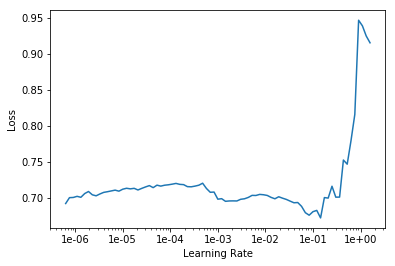

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:29
epoch  train_loss  valid_loss  accuracy
1      0.681736    0.654873    0.632850  (00:07)
2      0.634440    0.692297    0.512077  (00:07)
3      0.652436    0.655221    0.618357  (00:06)
4      0.619693    0.658089    0.632850  (00:07)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:11
epoch  train_loss  valid_loss  accuracy
1      0.647256    0.630399    0.705314  (00:16)
2      0.588868    0.588286    0.753623  (00:18)
3      0.562678    0.567647    0.768116  (00:18)
4      0.528252    0.558887    0.753623  (00:18)
5      0.493313    0.611650    0.700483  (00:19)
6      0.483116    0.492085    0.835749  (00:21)
7      0.502627    0.506717    0.816425  (00:16)
8      0.464179    0.430721    0.845411  (00:18)
9      0.440636    0.478686    0.806763  (00:19)
10     0.455951    0.412413    0.835749  (00:16)
11     0.442741    0.374420    0.850242  (00:18)
12     0.388268    0.355887    0.855072  (00:20)
13     0.343487    0.327882    0.859903  (00:18)
14     0.370395    0.359312    0.855072  (00:16)
15     0.366050    0.410144    0.835749  (00:17)
16     0.337302    0.336911    0.864734  (00:20)
17     0.334836    0.356637    0.850242  (00:19)
18     0.346565    0.333158    0.869565  (00:18)
19     0.274846    0.331691    0.855072  (00:20)
20     0.32

In [11]:
learn.validate()

[0.3872363, tensor(0.8454)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

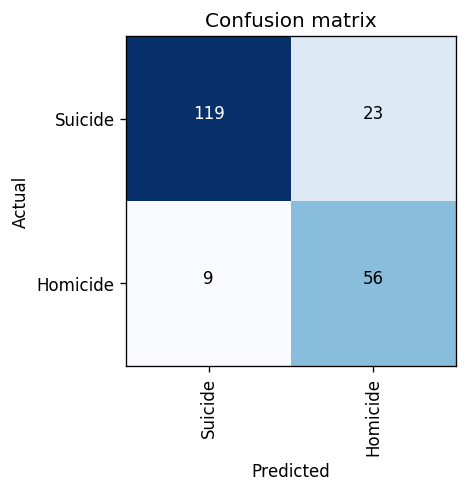

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

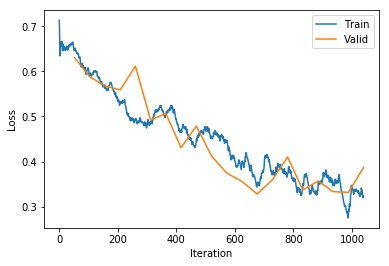

In [14]:
learn.recorder.plot_losses()

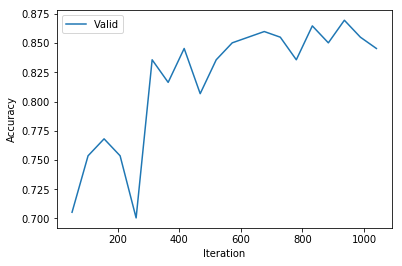

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


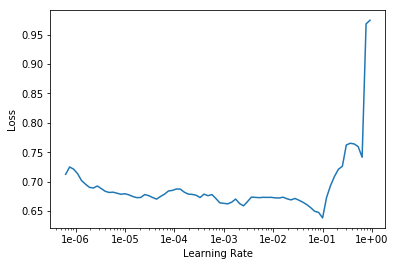

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.636195    0.562580    0.758454  (00:06)
2      0.642263    0.603477    0.695652  (00:06)
3      0.579066    0.609260    0.681159  (00:07)
4      0.598949    0.571244    0.777778  (00:06)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:13
epoch  train_loss  valid_loss  accuracy
1      0.507280    0.600470    0.685990  (00:20)
2      0.549010    0.530537    0.797101  (00:15)
3      0.501665    0.579132    0.763285  (00:21)
4      0.478201    0.496858    0.768116  (00:18)
5      0.483423    0.479024    0.816425  (00:18)
6      0.448037    0.481151    0.797101  (00:18)
7      0.439864    0.442770    0.816425  (00:18)
8      0.429898    0.478882    0.763285  (00:19)
9      0.382119    0.476089    0.816425  (00:20)
10     0.391431    0.491900    0.792271  (00:17)
11     0.379332    0.393885    0.821256  (00:19)
12     0.338360    0.455338    0.763285  (00:21)
13     0.376070    0.431073    0.821256  (00:17)
14     0.342180    0.398383    0.879227  (00:18)
15     0.335179    0.413448    0.840580  (00:17)
16     0.340190    0.410457    0.816425  (00:17)
17     0.348002    0.388820    0.821256  (00:16)
18     0.338299    0.377299    0.826087  (00:17)
19     0.363208    0.437845    0.826087  (00:16)
20     0.29

In [21]:
learn.validate()

[0.36547956, tensor(0.8261)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

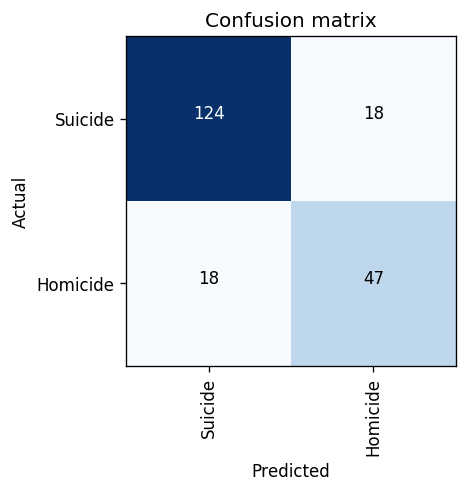

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

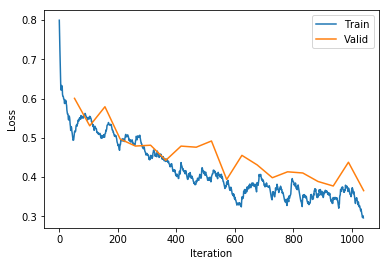

In [24]:
learn.recorder.plot_losses()

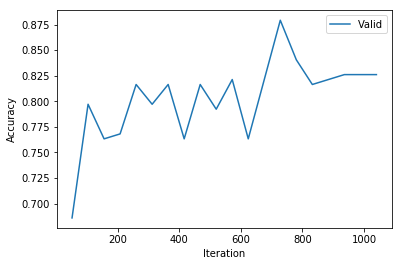

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


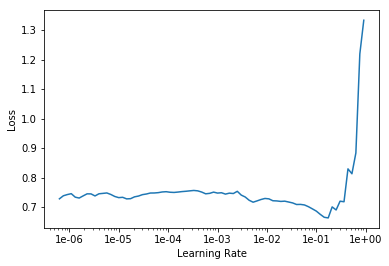

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.644872    0.717296    0.478261  (00:07)
2      0.668534    0.658496    0.555556  (00:06)
3      0.663213    0.675534    0.555556  (00:06)
4      0.677565    0.685475    0.690821  (00:06)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:01
epoch  train_loss  valid_loss  accuracy
1      0.573116    0.619567    0.681159  (00:18)
2      0.606509    0.587723    0.753623  (00:16)
3      0.574837    0.542711    0.797101  (00:19)
4      0.584877    0.535550    0.772947  (00:16)
5      0.570208    0.505918    0.816425  (00:16)
6      0.529314    0.578945    0.768116  (00:17)
7      0.477634    0.415259    0.830918  (00:19)
8      0.479935    0.397038    0.850242  (00:16)
9      0.480264    0.367689    0.835749  (00:16)
10     0.474879    0.436193    0.830918  (00:16)
11     0.421862    0.468133    0.801932  (00:17)
12     0.371105    0.383974    0.840580  (00:20)
13     0.385145    0.352099    0.864734  (00:17)
14     0.372822    0.459076    0.821256  (00:18)
15     0.379739    0.338210    0.888889  (00:17)
16     0.337832    0.369288    0.855072  (00:19)
17     0.310950    0.452669    0.816425  (00:19)
18     0.302449    0.513737    0.801932  (00:19)
19     0.306009    0.369584    0.884058  (00:18)
20     0.31

In [31]:
learn.validate()

[0.35384643, tensor(0.8406)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

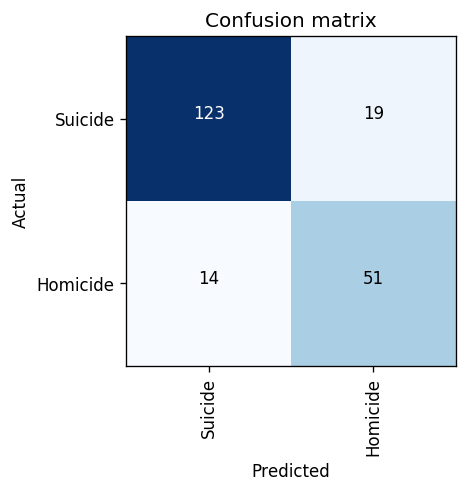

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

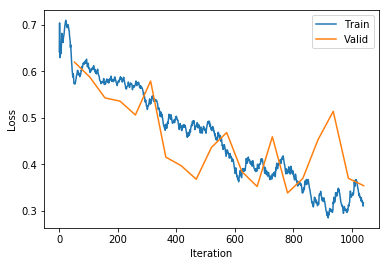

In [34]:
learn.recorder.plot_losses()

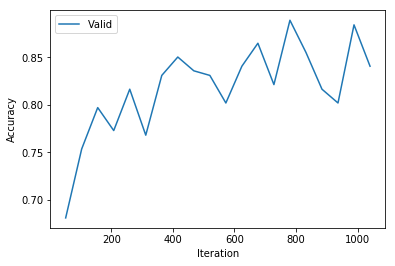

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


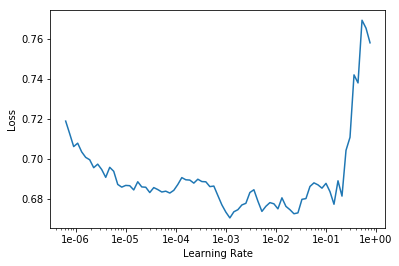

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:27
epoch  train_loss  valid_loss  accuracy
1      0.676939    0.599363    0.768116  (00:06)
2      0.638930    0.587393    0.685990  (00:06)
3      0.638649    0.589330    0.729469  (00:06)
4      0.586558    0.613295    0.652174  (00:07)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:11
epoch  train_loss  valid_loss  accuracy
1      0.574405    0.574872    0.734300  (00:20)
2      0.560831    0.501288    0.792271  (00:19)
3      0.572070    0.471641    0.801932  (00:16)
4      0.547621    0.471949    0.821256  (00:16)
5      0.537723    0.442071    0.845411  (00:16)
6      0.475016    0.424242    0.821256  (00:20)
7      0.430761    0.389589    0.850242  (00:21)
8      0.458051    0.386956    0.845411  (00:16)
9      0.399633    0.460233    0.792271  (00:20)
10     0.425262    0.433991    0.826087  (00:16)
11     0.379667    0.358370    0.864734  (00:19)
12     0.365989    0.367057    0.869565  (00:19)
13     0.379362    0.354328    0.850242  (00:17)
14     0.375050    0.353603    0.874396  (00:17)
15     0.366905    0.347715    0.864734  (00:16)
16     0.348598    0.437060    0.840580  (00:18)
17     0.334186    0.364952    0.850242  (00:17)
18     0.328814    0.318666    0.869565  (00:18)
19     0.315217    0.471768    0.811594  (00:20)
20     0.28

In [41]:
learn.validate()

[0.36252877, tensor(0.8357)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

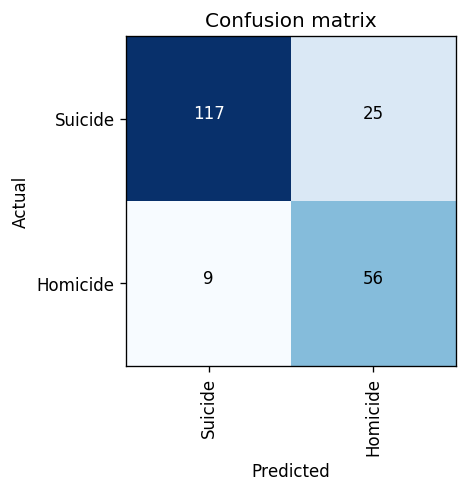

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

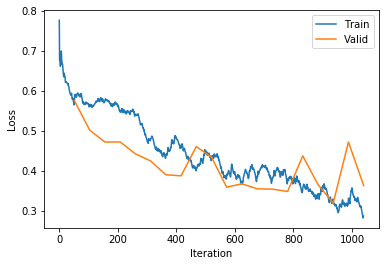

In [44]:
learn.recorder.plot_losses()

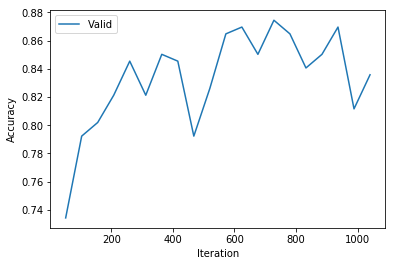

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


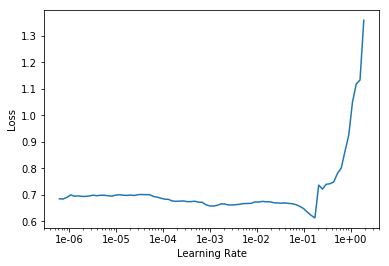

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:28
epoch  train_loss  valid_loss  accuracy
1      0.623519    0.603003    0.734300  (00:07)
2      0.634018    0.610589    0.671498  (00:06)
3      0.594971    0.617360    0.671498  (00:07)
4      0.571760    0.570209    0.714976  (00:07)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 06:13
epoch  train_loss  valid_loss  accuracy
1      0.522148    0.560541    0.739130  (00:21)
2      0.582819    0.468591    0.772947  (00:16)
3      0.542899    0.475021    0.801932  (00:19)
4      0.517371    0.459202    0.826087  (00:18)
5      0.473280    0.426815    0.821256  (00:19)
6      0.432023    0.439444    0.811594  (00:20)
7      0.446070    0.386082    0.840580  (00:18)
8      0.420355    0.415915    0.826087  (00:18)
9      0.443097    0.465466    0.806763  (00:16)
10     0.409868    0.400484    0.845411  (00:19)
11     0.411389    0.340821    0.874396  (00:15)
12     0.381943    0.357405    0.859903  (00:19)
13     0.363558    0.423827    0.835749  (00:18)
14     0.374104    0.334714    0.884058  (00:16)
15     0.370982    0.306110    0.874396  (00:17)
16     0.338667    0.370984    0.850242  (00:17)
17     0.298518    0.359458    0.855072  (00:20)
18     0.262804    0.291870    0.864734  (00:20)
19     0.302585    0.313906    0.874396  (00:18)
20     0.31

In [51]:
learn.validate()

[0.42552283, tensor(0.8502)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

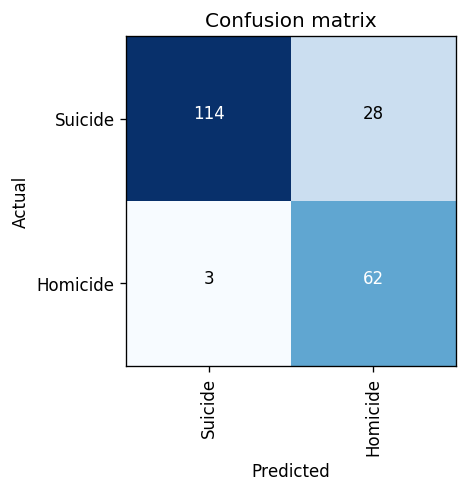

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

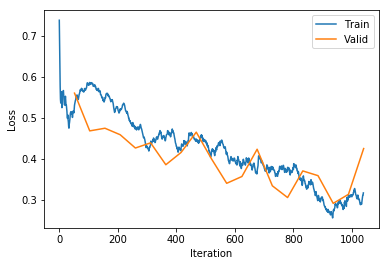

In [54]:
learn.recorder.plot_losses()

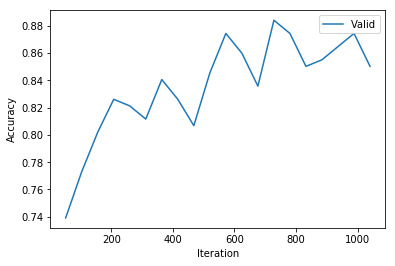

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8454106450080872, 0.8260869383811951, 0.8405796885490417, 0.8357487916946411, 0.8502415418624878]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.8396135210990906


In [58]:

data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_nidia_not_pretrained')

learn.freeze()

In [59]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


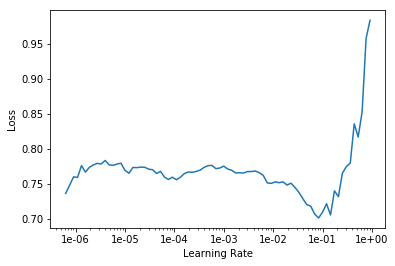

In [60]:
learn.recorder.plot()

In [61]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.748486    0.674701    0.559846  (00:07)
2      0.679526    0.666574    0.571429  (00:09)
3      0.685482    0.586690    0.694981  (00:07)
4      0.640148    0.652184    0.633205  (00:09)



In [62]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:36
epoch  train_loss  valid_loss  accuracy
1      0.692770    0.536354    0.787645  (00:19)
2      0.620825    0.575227    0.737452  (00:24)
3      0.562319    0.485513    0.795367  (00:25)
4      0.576495    0.522610    0.776062  (00:22)
5      0.535972    0.430842    0.837838  (00:25)
6      0.489180    0.398707    0.845560  (00:24)
7      0.521798    0.392985    0.861004  (00:19)
8      0.461895    0.439012    0.841699  (00:23)
9      0.503502    0.369631    0.868726  (00:19)
10     0.478731    0.434378    0.837838  (00:20)
11     0.431433    0.432004    0.861004  (00:23)
12     0.383078    0.445536    0.830116  (00:23)
13     0.355063    0.333727    0.849421  (00:24)
14     0.346016    0.293635    0.884170  (00:24)
15     0.340482    0.348367    0.872587  (00:23)
16     0.393457    0.382051    0.853282  (00:21)
17     0.366686    0.376643    0.849421  (00:22)
18     0.305653    0.303850    0.880309  (00:25)
19     0.309783    0.389714    0.841699  (00:22)
20     0.34

In [63]:
learn.validate()

[0.30446237, tensor(0.8687)]

In [64]:
accuracy_list.append(learn.validate()[1].item())

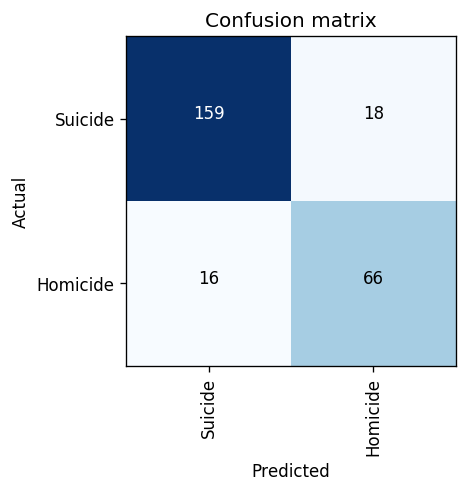

In [65]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [66]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(60002, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(60002, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1150)
      )
      (1): WeightDropout(
        (module): LSTM(1150, 1150)
      )
      (2): WeightDropout(
        (module): LSTM(1150, 400)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.04000000000000001)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
     

In [67]:
import torch

torch.cuda.empty_cache()